<a href="https://colab.research.google.com/github/JumanaRahim/workshop/blob/master/LND-2CLS-KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:

import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
path = '/content/drive/MyDrive/JSRT_NEW/dataset_jumana/dataset (1)'

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [18]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/JSRT_NEW/dataset_jumana/dataset (1)/train',
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'binary')

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator = val_datagen.flow_from_directory(
   '/content/drive/MyDrive/JSRT_NEW/dataset_jumana/dataset (1)/test',
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'binary')

Found 246 images belonging to 2 classes.
Found 143 images belonging to 2 classes.


(300, 300, 3)
(1, 300, 300, 3)


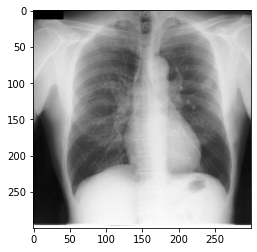

In [19]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/JSRT_NEW/dataset_jumana/dataset (1)/train/malignant/JPCLN001.png",target_size=(300,300))
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)

In [33]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT,IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', name='predictions'))

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])




In [34]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
earlystop = EarlyStopping(patience=10)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

In [35]:
history = model.fit_generator(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[earlystop, checkpoint]
)

<ipython-input-35-718605ae02fe>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
8/8 [==============================] - 22s 3s/step - loss: 0.6355 - accuracy: 0.6667 - val_loss: 0.7114 - val_accuracy: 0.5175
Epoch 2/25
8/8 [==============================] - 20s 3s/step - loss: 0.6204 - accuracy: 0.7236 - val_loss: 0.7101 - val_accuracy: 0.5175
Epoch 3/25
8/8 [==============================] - 20s 3s/step - loss: 0.6097 - accuracy: 0.7236 - val_loss: 0.7045 - val_accuracy: 0.5175
Epoch 4/25
8/8 [==============================] - 20s 3s/step - loss: 0.5881 - accuracy: 0.7236 - val_loss: 0.7074 - val_accuracy: 0.5175
Epoch 5/25
8/8 [==============================] - 24s 3s/step - loss: 0.6037 - accuracy: 0.7236 - val_loss: 0.7094 - val_accuracy: 0.5175
Epoch 6/25
8/8 [==============================] - 19s 2s/step - loss: 0.6016 - accuracy: 0.7236 - val_loss: 0.6974 - val_accuracy: 0.5175
Epoch 7/25
8/8 [==============================] - 21s 3s/step - loss: 0.5799 - accuracy: 0.7236 - val_loss: 0.7078 - val_accuracy: 0.5175
Epoch 8/25
8/8 [==================